# Classification Test #2

In [1]:
import sdm as sdmlib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import urllib, cStringIO
import random
from IPython.core.display import display, Image as IPythonImage
%matplotlib inline

In [2]:
width = 30
height = 30
noise_flip = True

In [3]:
def gen_img(letter='A'):
    img = Image.new('RGBA', (30, 30), (255, 255, 255))
    font = ImageFont.truetype('Arial.ttf', 30)
    draw = ImageDraw.Draw(img)
    draw.text((5, 0), letter, (0, 0, 0), font=font)
    return img

In [4]:
def gen_noise_add(img, p=0.15, flip=False):
    img2 = img.copy()
    draw = ImageDraw.Draw(img2)
    for py in xrange(height):
        for px in xrange(width):
            if random.random() < p:
                if flip:
                    pixel = img.getpixel((px, py))
                    value = sum([int(x/255+0.5) for x in pixel[:3]])//3
                    assert value == 0 or value == 1
                    value = (1 - value)*255
                    draw.point((px, py), fill=(value, value, value))
                else:
                    draw.point((px, py), fill=(0, 0, 0))
    return img2

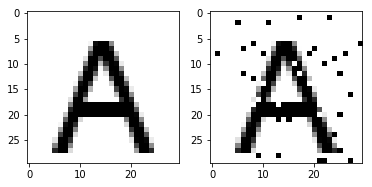

In [5]:
img = gen_img();
img2 = gen_noise_add(img, p=0.05, flip=noise_flip)
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(img2);

In [6]:
def to_bitstring(img):
    v = []
    bs = sdmlib.Bitstring.init_ones(1000)
    for py in xrange(height):
        for px in xrange(width):
            pixel = img.getpixel((px, py))
            value = sum([int(x/255+0.5) for x in pixel[:3]])//3
            assert value == 0 or value == 1
            idx = px+width*py
            assert idx >= 0 and idx < 1000, 'Ops {} {} {}'.format(x, y, idx)
            bs.set_bit(idx, value)
            v.append(value)
    v2 = [bs.get_bit(i) for i in xrange(height*width)]
    assert v == v2
    return bs

In [7]:
def to_img(bs):
    img = Image.new('RGBA', (30, 30), (255, 255, 255))
    draw = ImageDraw.Draw(img)
    for py in xrange(height):
        for px in xrange(width):
            idx = px+width*py
            assert idx >= 0 and idx < 1000, 'Ops {} {} {}'.format(x, y, idx)
            x = 255*bs.get_bit(idx)
            draw.point((px, py), fill=(x, x, x))
    return img

In [8]:
bits = 1000
sample = 1000000
scanner_type = sdmlib.SDM_SCANNER_OPENCL

In [9]:
address_space = sdmlib.AddressSpace.init_from_b64_file('sdm-letters.as')
counter = sdmlib.Counter.create_file('sdm-classification-2', bits, sample)
sdm = sdmlib.SDM(address_space, counter, 451, scanner_type)

In [10]:
for i in xrange(0):
    print i,
    b = sdmlib.Bitstring.init_random(1000)
    sdm.write(b, b)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36

KeyboardInterrupt: 

In [13]:
def fill_memory(letter, label_bs, p=0.1, n=100):
    cols = 15
    rows = n//cols + 1
    plt.figure(figsize=(20,10))
    for i in xrange(n):
        img = gen_img(letter=letter);
        img2 = gen_noise_add(img, p=p, flip=noise_flip)
        #display(img2)
        plt.subplot(rows, cols, i+1)
        plt.imshow(img2)
        bs = to_bitstring(img2)
        sdm.write(bs, label_bs)
    plt.show()

In [24]:
def read(letter, n=6, p=0.2, radius=None):
    n = 7
    cols = 15
    rows = n//cols + 1
    plt.figure(figsize=(20,10))

    img = gen_img(letter=letter);
    img2 = gen_noise_add(img, p=p, flip=noise_flip)
    plt.subplot(rows, cols, 1)
    plt.imshow(img2)
    
    bs2 = to_bitstring(img2)
    bs3 = sdm.read(bs2, radius=radius)
    
    label = min(label_to_bs.items(), key=lambda v: bs3.distance_to(v[1]))
    return label[0]

In [15]:
labels = list('ABCD8')
label_to_bs = {}
for x in labels:
    label_to_bs[x] = sdmlib.Bitstring.init_random(1000)

Training for label A...


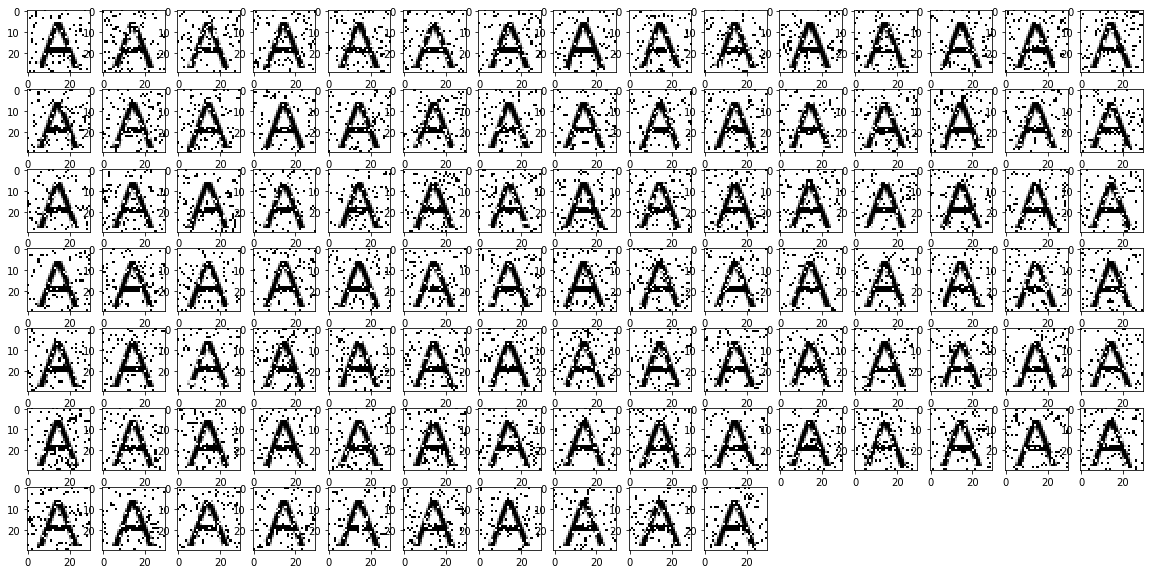

Training for label B...


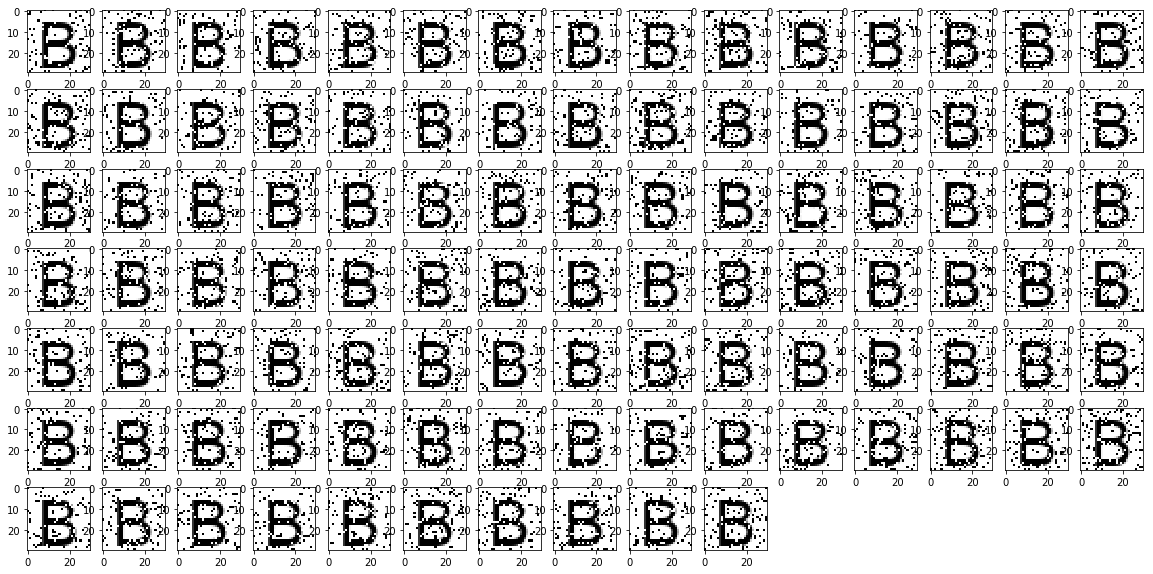

Training for label C...


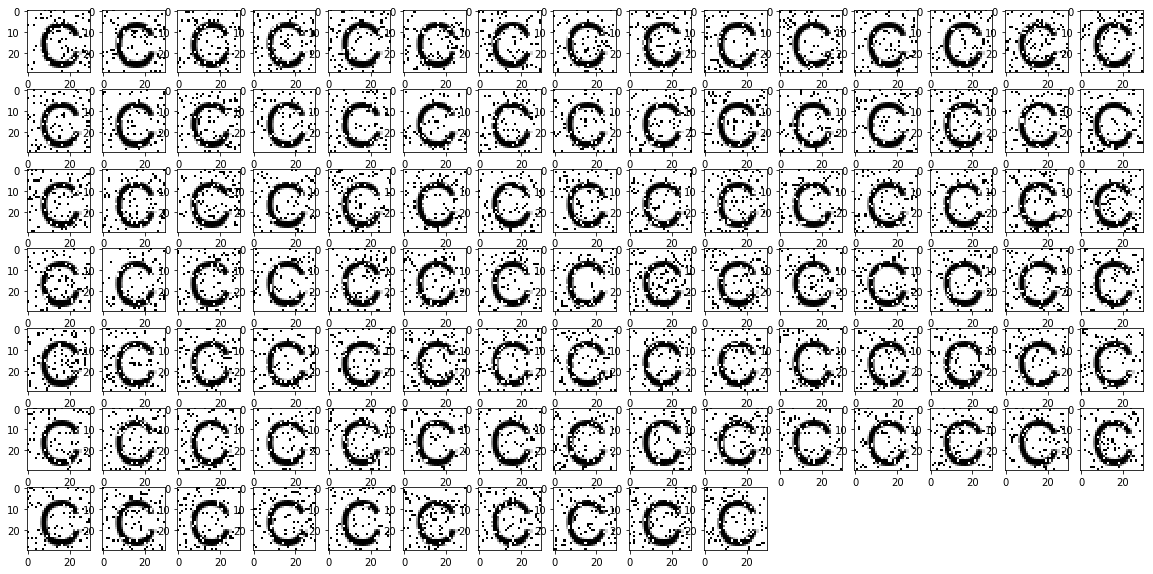

Training for label D...


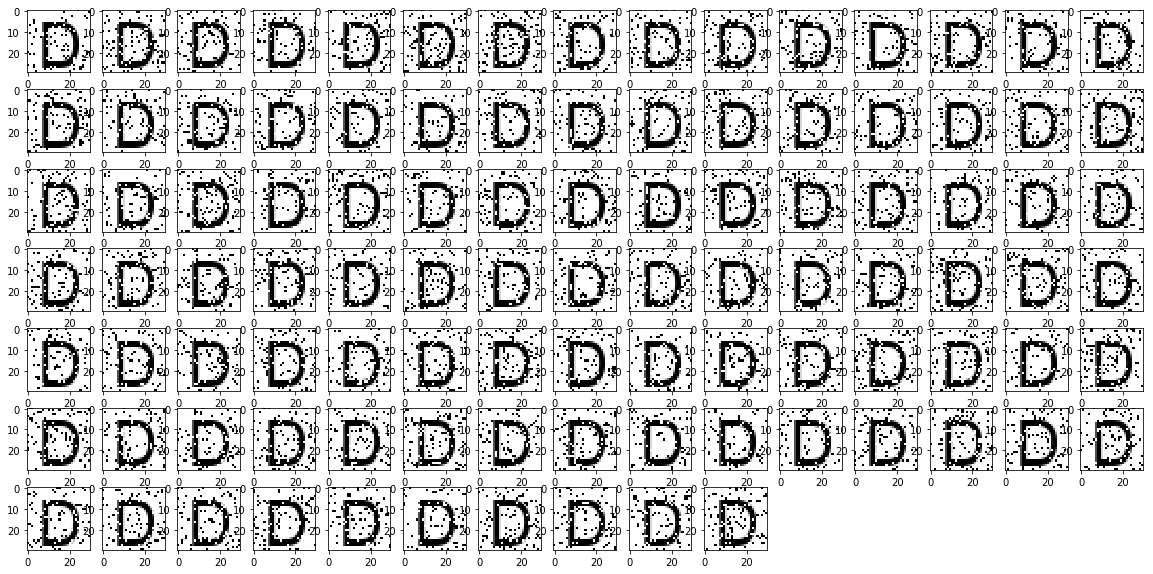

Training for label 8...


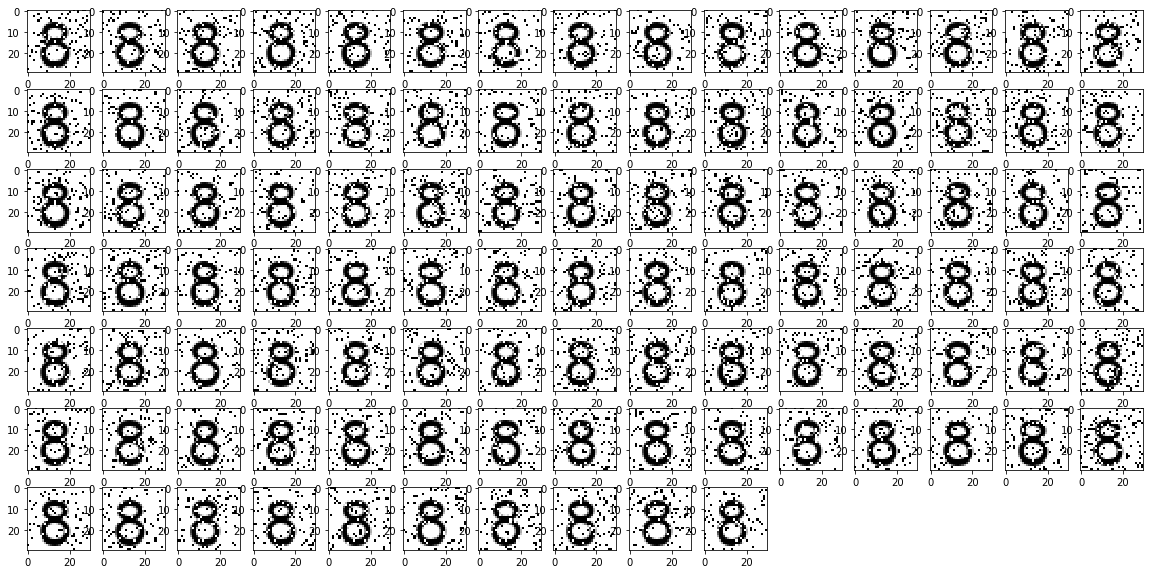

In [16]:
for x in labels:
    print 'Training for label {}...'.format(x)
    fill_memory(x, label_to_bs[x])

'C'

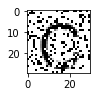

In [25]:
read('C')

'A'

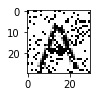

In [26]:
read('A')

'D'

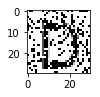

In [27]:
read('D')

'8'

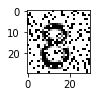

In [28]:
read('8')

'B'

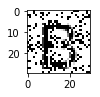

In [29]:
read('B')

In [31]:
labels += list('OQ')
for x in list('OQ'):
    label_to_bs[x] = sdmlib.Bitstring.init_random(1000)

Training for label O...


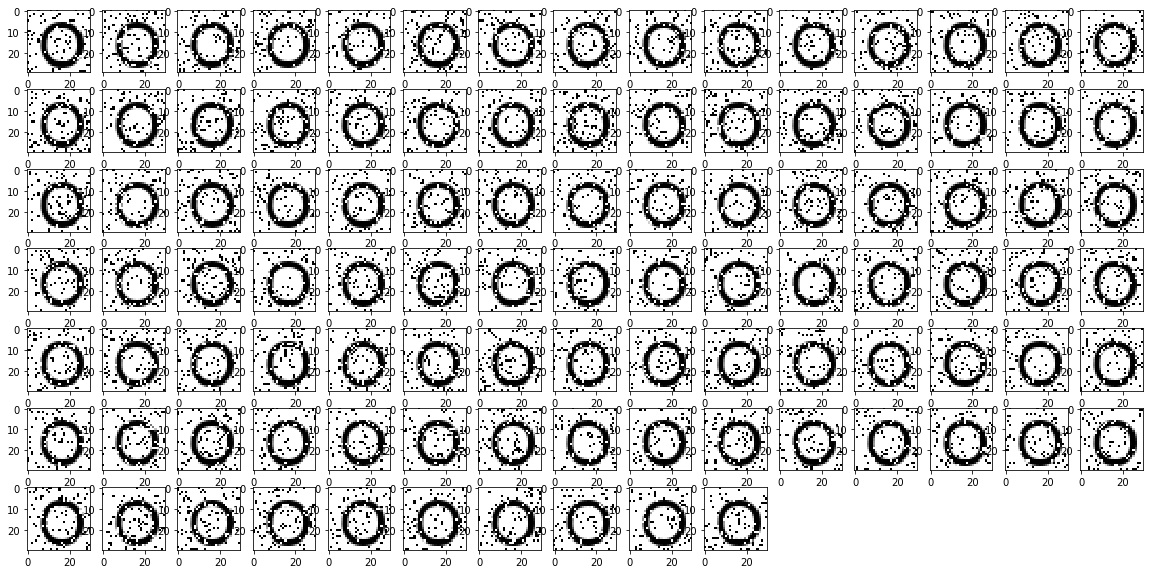

Training for label Q...


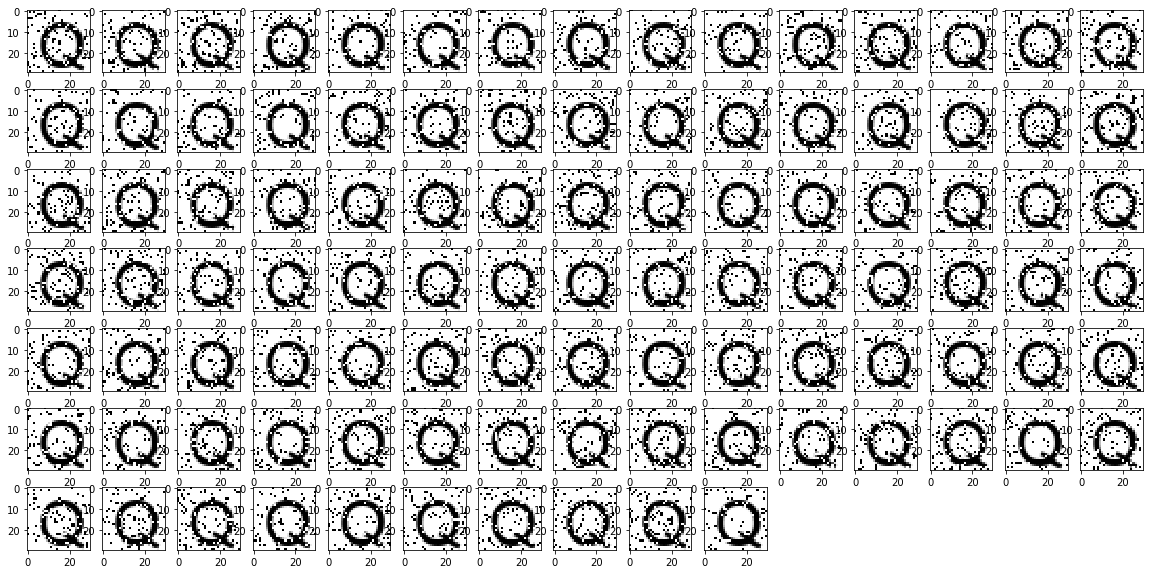

In [33]:
for x in list('OQ'):
    print 'Training for label {}...'.format(x)
    fill_memory(x, label_to_bs[x])

'C'

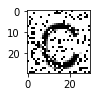

In [34]:
read('C')

'D'

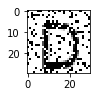

In [35]:
read('D')

'O'

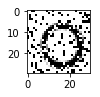

In [36]:
read('O')

'Q'

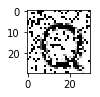

In [37]:
read('Q')

Training for label 0...


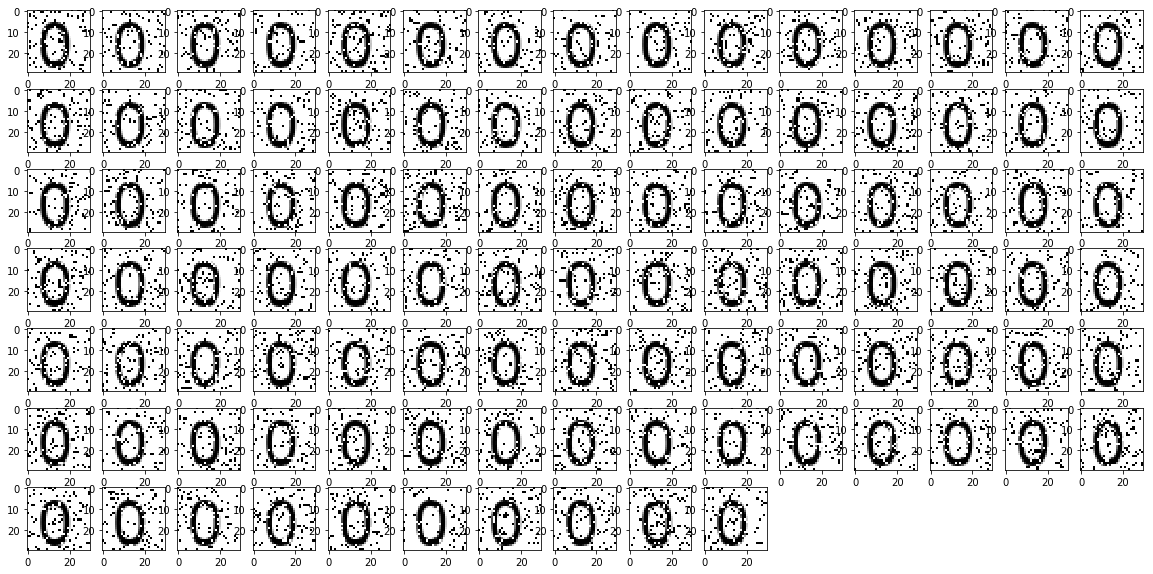

In [38]:
labels += list('0')
for x in list('0'):
    label_to_bs[x] = sdmlib.Bitstring.init_random(1000)
for x in list('0'):
    print 'Training for label {}...'.format(x)
    fill_memory(x, label_to_bs[x])

'D'

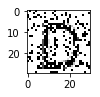

In [39]:
read('D')

'C'

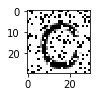

In [40]:
read('C')

'Q'

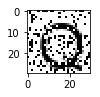

In [41]:
read('Q')

'O'

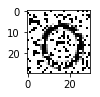

In [42]:
read('O')

'0'

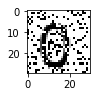

In [43]:
read('0')